<a href="https://colab.research.google.com/github/Maher1410/Face_Mask_Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/New Masks Dataset/Train'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_train = np.array(data)
y_train = np.array(label)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/New Masks Dataset/Test'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_test = np.array(data)
y_test = np.array(label)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/New Masks Dataset/Validation'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(224,224))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

x_val = np.array(data)
y_val = np.array(label)

In [ ]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_val = le.fit_transform(y_val)
labelEnc_test = le.fit_transform(y_test)

In [ ]:
print(x_val.shape)
print(labelEnc_val.shape)

(306, 224, 224, 3)
(306,)


In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=5, batch_size=32)

Epoch 1/5
19/19 [==============================] - 78s 4s/step - loss: 1.2520 - acc: 0.6817 - val_loss: 0.3641 - val_acc: 0.8758
Epoch 2/5
19/19 [==============================] - 68s 4s/step - loss: 0.3774 - acc: 0.8533 - val_loss: 0.2945 - val_acc: 0.8791
Epoch 3/5
19/19 [==============================] - 64s 3s/step - loss: 0.3061 - acc: 0.8767 - val_loss: 0.2607 - val_acc: 0.9085
Epoch 4/5
19/19 [==============================] - 66s 4s/step - loss: 0.2421 - acc: 0.9150 - val_loss: 0.2659 - val_acc: 0.9085
Epoch 5/5
19/19 [==============================] - 67s 3s/step - loss: 0.2476 - acc: 0.9183 - val_loss: 0.2691 - val_acc: 0.8922


In [ ]:
oss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

4/4 [==============================] - 2s 470ms/step - loss: 0.2102 - acc: 0.9200
Test Accuracy = 0.9200000166893005


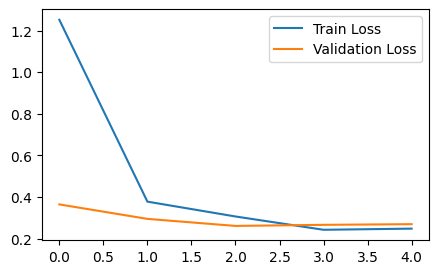

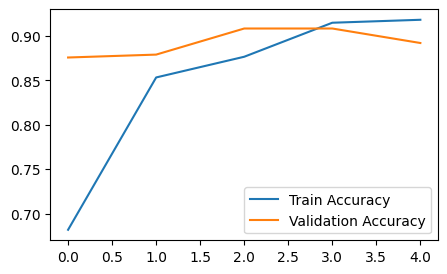

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
mod = tf.keras.models.load_model('model.h5')

1/1 [==============================] - 0s 115ms/step
The Prediction For This Image = 0
The Actual Prediction For This Image = 0


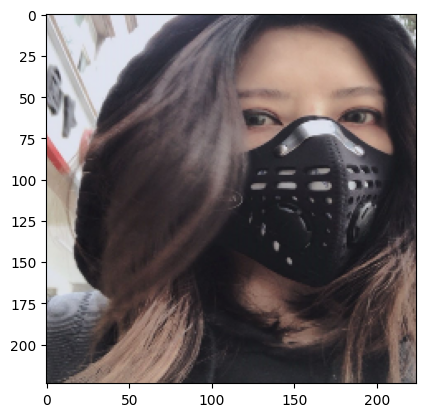

In [ ]:
idx = np.random.randint(0,x_test.shape[0])
pic = x_test[idx]
Ipic = np.expand_dims(pic,axis=0)
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)
print("The Prediction For This Image =",predictions)
print("The Actual Prediction For This Image =",labelEnc_test[idx])
fig,ax = plt.subplots()
ax.imshow(pic)
plt.imshow(pic)

In [ ]:
!pip install gradio

In [ ]:
labels = np.unique(y_train)
labels

array(['Mask', 'Non Mask'], dtype='<U8')

In [ ]:
def predict_input_image(img):
    image = img.reshape(-1,224,224,3)
    prediction = mod.predict(image)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(2)}
    return confidences

In [ ]:
import gradio as gr
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=2)
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True', share='True')

<ipython-input-38-dcf3a5088cbb>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-38-dcf3a5088cbb>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-38-dcf3a5088cbb>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
<ipython-input-38-dcf3a5088cbb>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c0b0f391f7a5647ca8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 55ms/step
